In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
import matplotlib.font_manager as fm
import matplotlib

font_path='C:\\Windows\\Fonts\\gulim.ttc'
font=fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

# 전처리

In [104]:
# 데이터 로드
df=pd.read_csv('../../data/BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
# 의미 없는 데이터 열 제거
df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)
# df = df.loc[:, df.columns.str.startswith(("Total_",'Attrition_Flag'))]
df = df.loc[:, ~df.columns.str.startswith("Total_")]
df

,Attrition_Flag,Total_Relationship_Count,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,Existing Customer,5,777,1.335,1144,42,1.625
1,Existing Customer,6,864,1.541,1291,33,3.714
2,Existing Customer,4,0,2.594,1887,20,2.333
3,Existing Customer,3,2517,1.405,1171,20,2.333
4,Existing Customer,5,0,2.175,816,28,2.500
...,...,...,...,...,...,...,...
10122,Existing Customer,3,1851,0.703,15476,117,0.857
10123,Attrited Customer,4,2186,0.804,8764,69,0.683
10124,Attrited Customer,5,0,0.819,10291,60,0.818
10125,Attrited Customer,4,0,0.535,8395,62,0.722


In [106]:
# 이탈 여부 라벨 인코딩
df['Attrition_Flag'] = df['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

C:\Users\Playdata\AppData\Local\Temp\ipykernel_3348\2124312663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition_Flag'] = df['Attrition_Flag'].map({


In [107]:
# 라벨 인코딩(데이터의 순서 o): 이탈 여부, 성별, 교육 수준
# 원 핫 인코딩(데이터의 순서 x): 결혼 여부, 소득수준, 카드종류

# from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# le=LabelEncoder()
# OHe=OneHotEncoder()

# # 라벨 인코딩
# le_cols=['Gender' ]
# for col in le_cols:
#     df[col]=le.fit_transform(df[col])

# # 원 핫 인코딩
# OHe_cols=['Education_Level','Marital_Status', 'Income_Category', 'Card_Category']
# df = pd.get_dummies(df, columns=OHe_cols, drop_first=True)

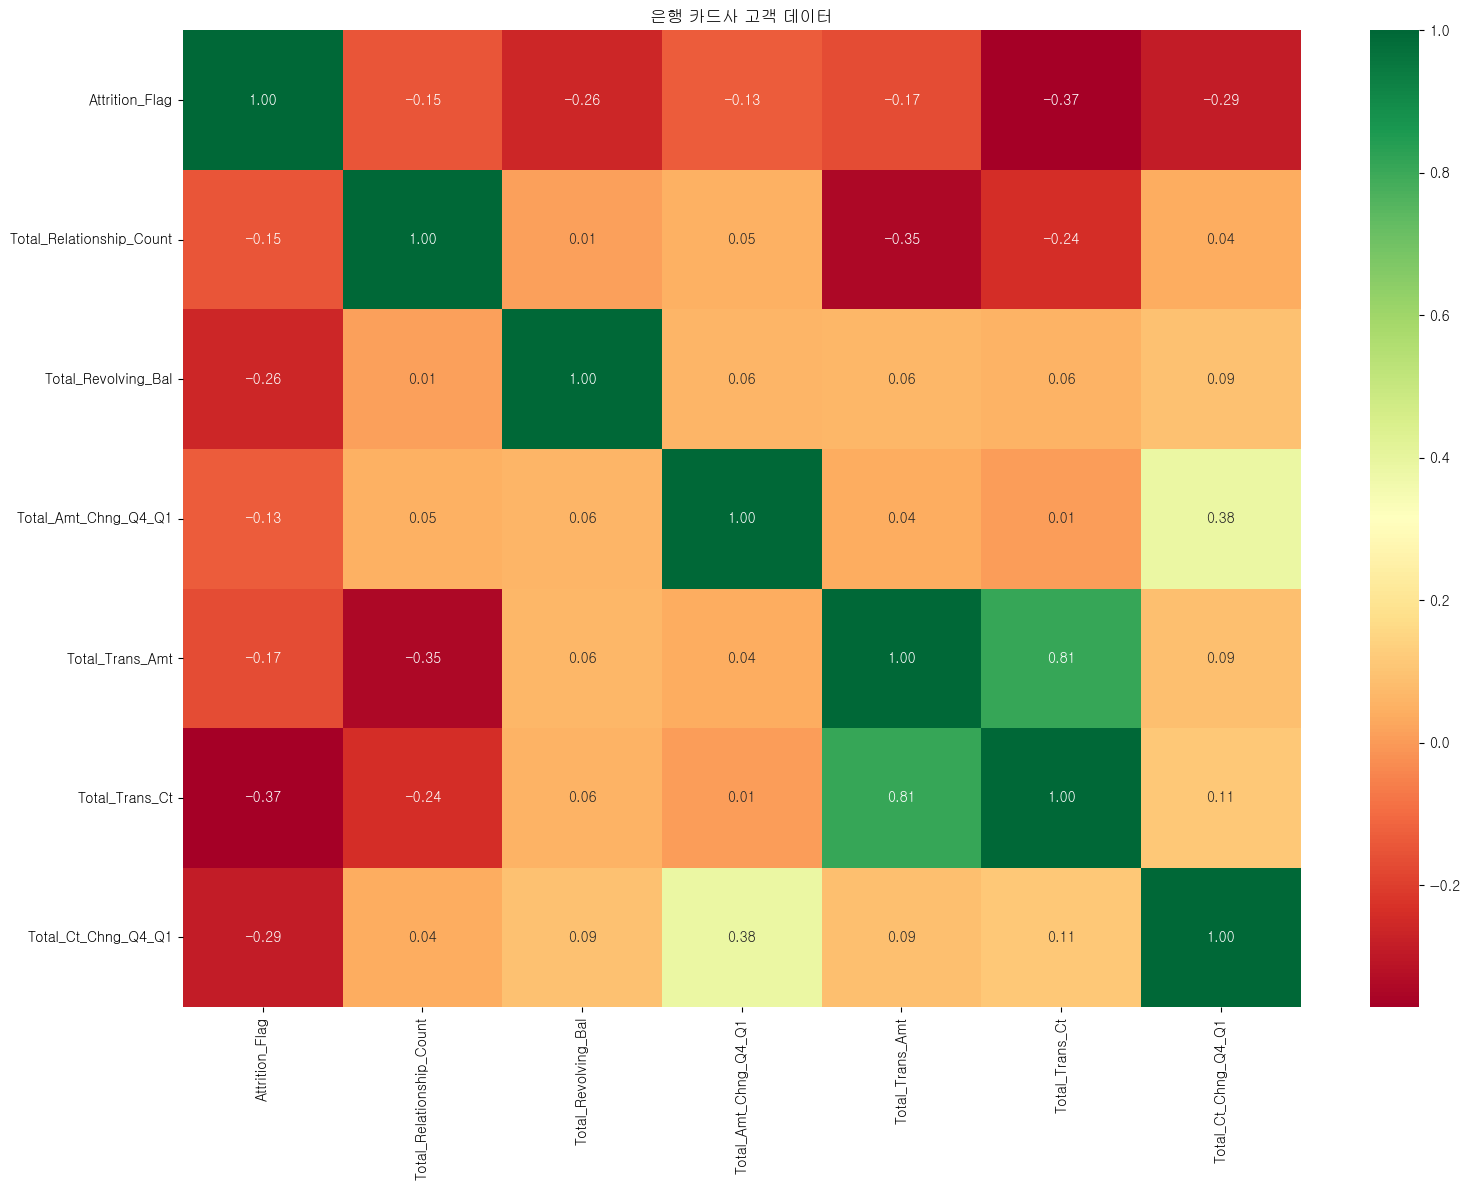

In [108]:
# 인코딩 후 데이터셋 히트맵 시각화
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation, cmap='RdYlGn', annot=True, fmt=".2f")
plt.title("은행 카드사 고객 데이터")
plt.tight_layout()
plt.show()

# 학습

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# 학습, 타겟 분리
X = df.drop(columns=["Attrition_Flag"])
y = df["Attrition_Flag"]

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1701
           1       0.78      0.50      0.61       325

    accuracy                           0.90      2026
   macro avg       0.84      0.74      0.77      2026
weighted avg       0.89      0.90      0.89      2026



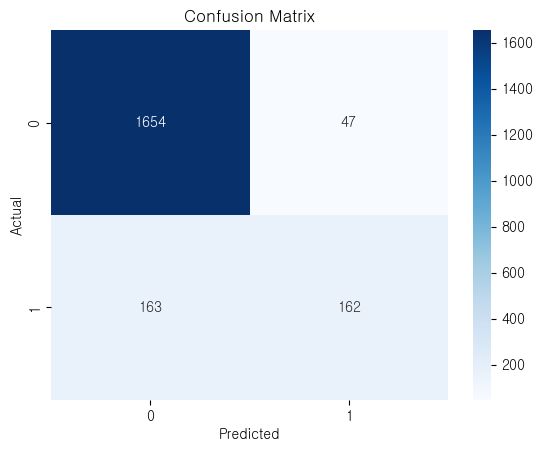

In [110]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 학습
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1701
           1       0.86      0.80      0.83       325

    accuracy                           0.95      2026
   macro avg       0.91      0.89      0.90      2026
weighted avg       0.95      0.95      0.95      2026



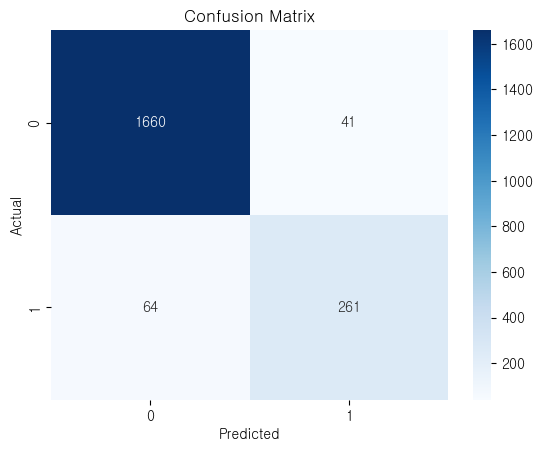

In [111]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1701
           1       0.88      0.85      0.86       325

    accuracy                           0.96      2026
   macro avg       0.92      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026



c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:13:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


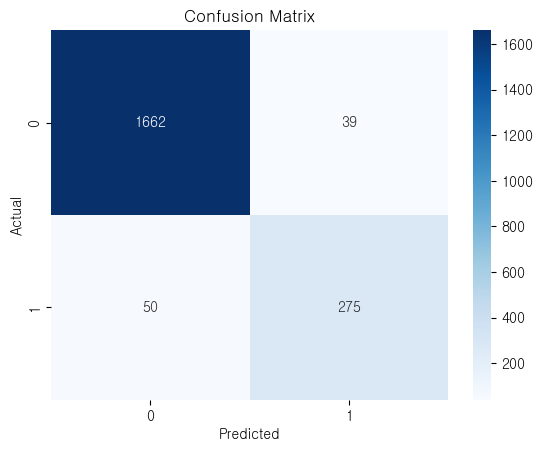

In [112]:
from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = xgb_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()